In [1]:
import sys
sys.path.append('../functions/')
from bike_rentals import BikeRentals

In [2]:
data = BikeRentals()

In [3]:
data.download_url()

Exception: File already exists

In [6]:
data.unzip()

In [7]:
df = data.data_df
df 

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [5]:
type(df)

type

## Day 2, Phase 2


 Change the method you are using to read the dataframe to convert the dataframe index to hold daily datetime information.

 Change the plot() method of the class you already developed to be compatible with the changes.

In [8]:
import datetime

In [9]:
import pandas as pd
df.set_index(pd.to_datetime(df.dteday) + df.hr.astype('timedelta64[h]'), inplace = True)

In [10]:
df.index.dtype

dtype('<M8[ns]')

In [55]:
def regression():
        """The user chooses a week and inputs it. The function
        Builds a regression with column 'instant' in the x-axis
        and the column 'cnt' in the y-axis for the chosen week.

        Returns:
                plt.show(): returns plt graph that is a regression between
                the number of rentals and the instant in time for the
                chosen week.
        """

        pd.options.mode.chained_assignment = None

        week = 0

        week_exclude = [0,96,105]

        rentals_df = df

        rentals_df["week"] = 0

        for num in range((len(rentals_df)-1)):
            if (rentals_df.index[num].week != rentals_df.index[num+1].week):
                rentals_df['week'][num+1] = rentals_df['week'][num] + 1
            else:
                rentals_df['week'][num+1] = rentals_df['week'][num]

        for week_to_exclude in week_exclude:
            rentals_df = rentals_df[rentals_df['week']!= week_to_exclude]

        keys = list(set(list(rentals_df['week'])))

        new_values = list(range(103))

        dic_change = dict(zip(keys, new_values))


        # rentals_df = rentals_df.replace({"week": dic_change})
        rentals_df['week'] = rentals_df['week'].map( dic_change )

        week_num = int(input("Choose the week you want to see the data for:"))

        if week_num not in range(103):
            raise Exception("Please enter a number between 0 and 102 :)")


        filtered_week_df = rentals_df[rentals_df["week"] == week_num]


        filtered_week_df.plot(y='cnt', use_index = True, figsize=(15,6), style='o')

        plt.title(
            "\nNumber of Rentals per instant (for week {0})\n".format(week_num),
            {"fontsize": 16},
        )

        return plt.show()


In [11]:
df

instant      dteday  season  yr  mnth  hr  holiday  \
2011-01-01 00:00:00        1  2011-01-01       1   0     1   0        0   
2011-01-01 01:00:00        2  2011-01-01       1   0     1   1        0   
2011-01-01 02:00:00        3  2011-01-01       1   0     1   2        0   
2011-01-01 03:00:00        4  2011-01-01       1   0     1   3        0   
2011-01-01 04:00:00        5  2011-01-01       1   0     1   4        0   
...                      ...         ...     ...  ..   ...  ..      ...   
2012-12-31 19:00:00    17375  2012-12-31       1   1    12  19        0   
2012-12-31 20:00:00    17376  2012-12-31       1   1    12  20        0   
2012-12-31 21:00:00    17377  2012-12-31       1   1    12  21        0   
2012-12-31 22:00:00    17378  2012-12-31       1   1    12  22        0   
2012-12-31 23:00:00    17379  2012-12-31       1   1    12  23        0   

                     weekday  workingday  weathersit  temp   atemp   hum  \
2011-01-01 00:00:00        6           0           1  0.24  0.2879  0.81   
2011-01-01 01:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 02:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 03:00:00        6           0           1  0.24  0.2879  0.75   
2011-01-01 04:00:00        6           0           1  0.24  0.2879  0.75   
...                      ...         ...         ...   ...     ...   ...   
2012-12-31 19:00:00        1           1           2  0.26  0.2576  0.60   
2012-12-31 20:00:00        1           1           2  0.26  0.2576  0.60   
2012-12-31 21:00:00        1           1           1  0.26  0.2576  0.60   
2012-12-31 22:00:00        1           1           1  0.26  0.2727  0.56   
2012-12-31 23:00:00        1           1           1  0.26  0.2727  0.65   

                     windspeed  casual  registered  cnt  
2011-01-01 00:00:00     0.0000       3          13   16  
2011-01-01 01:00:00     0.0000       8          32   40  
2011-01-01 02:00:00     0.0000       5          27   32  
2011-01-01 03:00:00     0.0000       3          10   13  
2011-01-01 04:00:00     0.0000       0           1    1  
...                        ...     ...         ...  ...  
2012-12-31 19:00:00     0.1642      11         108  119  
2012-12-31 20:00:00     0.1642       8          81   89  
2012-12-31 21:00:00     0.1642       7          83   90  
2012-12-31 22:00:00     0.1343      13          48   61  
2012-12-31 23:00:00     0.1343      12          37   49  

[17379 rows x 17 columns]

In [13]:
df.groupby(['mnth','yr'])['cnt'].agg(['sum']).reset_index(level=[1])

yr     sum
mnth            
1      0   38189
1      1   96744
2      0   48215
2      1  103137
3      0   64045
3      1  164875
4      0   94870
4      1  174224
5      0  135821
5      1  195865
6      0  143512
6      1  202830
7      0  141341
7      1  203607
8      0  136691
8      1  214503
9      0  127418
9      1  218573
10     0  123511
10     1  198841
11     0  102167
11     1  152664
12     0   87323
12     1  123713

Choose the week you want to see the data for: 6


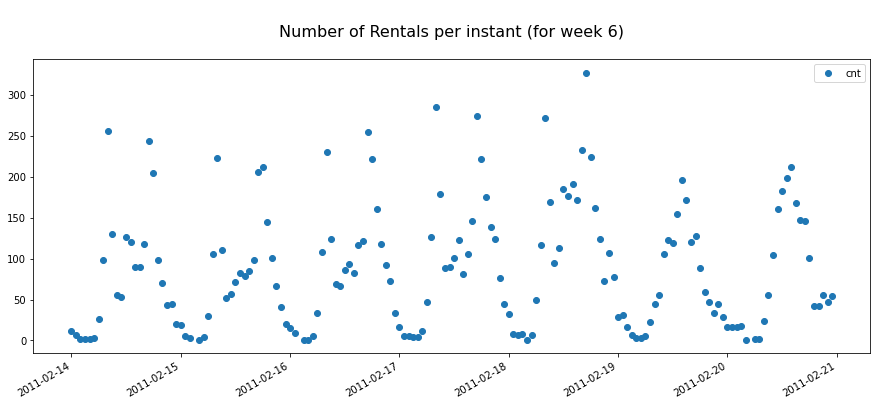

In [56]:
import matplotlib.pyplot as plt
regression()

In [12]:
df['week'] = 0
for num in range((len(df)-1)):
    if (df.index[num].week != df.index[num+1].week):
        df['week'][num+1] = df['week'][num] + 1
    else:
        df['week'][num+1] = df['week'][num]

In [13]:
df

instant      dteday  season  yr  mnth  hr  holiday  \
2011-01-01 00:00:00        1  2011-01-01       1   0     1   0        0   
2011-01-01 01:00:00        2  2011-01-01       1   0     1   1        0   
2011-01-01 02:00:00        3  2011-01-01       1   0     1   2        0   
2011-01-01 03:00:00        4  2011-01-01       1   0     1   3        0   
2011-01-01 04:00:00        5  2011-01-01       1   0     1   4        0   
...                      ...         ...     ...  ..   ...  ..      ...   
2012-12-31 19:00:00    17375  2012-12-31       1   1    12  19        0   
2012-12-31 20:00:00    17376  2012-12-31       1   1    12  20        0   
2012-12-31 21:00:00    17377  2012-12-31       1   1    12  21        0   
2012-12-31 22:00:00    17378  2012-12-31       1   1    12  22        0   
2012-12-31 23:00:00    17379  2012-12-31       1   1    12  23        0   

                     weekday  workingday  weathersit  temp   atemp   hum  \
2011-01-01 00:00:00        6           0           1  0.24  0.2879  0.81   
2011-01-01 01:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 02:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 03:00:00        6           0           1  0.24  0.2879  0.75   
2011-01-01 04:00:00        6           0           1  0.24  0.2879  0.75   
...                      ...         ...         ...   ...     ...   ...   
2012-12-31 19:00:00        1           1           2  0.26  0.2576  0.60   
2012-12-31 20:00:00        1           1           2  0.26  0.2576  0.60   
2012-12-31 21:00:00        1           1           1  0.26  0.2576  0.60   
2012-12-31 22:00:00        1           1           1  0.26  0.2727  0.56   
2012-12-31 23:00:00        1           1           1  0.26  0.2727  0.65   

                     windspeed  casual  registered  cnt  week  
2011-01-01 00:00:00     0.0000       3          13   16     0  
2011-01-01 01:00:00     0.0000       8          32   40     0  
2011-01-01 02:00:00     0.0000       5          27   32     0  
2011-01-01 03:00:00     0.0000       3          10   13     0  
2011-01-01 04:00:00     0.0000       0           1    1     0  
...                        ...     ...         ...  ...   ...  
2012-12-31 19:00:00     0.1642      11         108  119   105  
2012-12-31 20:00:00     0.1642       8          81   89   105  
2012-12-31 21:00:00     0.1642       7          83   90   105  
2012-12-31 22:00:00     0.1343      13          48   61   105  
2012-12-31 23:00:00     0.1343      12          37   49   105  

[17379 rows x 18 columns]

## Day 2, Phase 3


 Add a method to the class that plots the average total rentals by month of the year. You decide the name, just make sure you add it to the Class' documentation.

 The method should plot a barchart where the x-axis is the month and the y-axis is the total average rentals. For example, for January: 0.5*(sum(January 2011) + sum(January 2012)).

In [114]:
value = 10000
f"{value:,}"

'10,000'

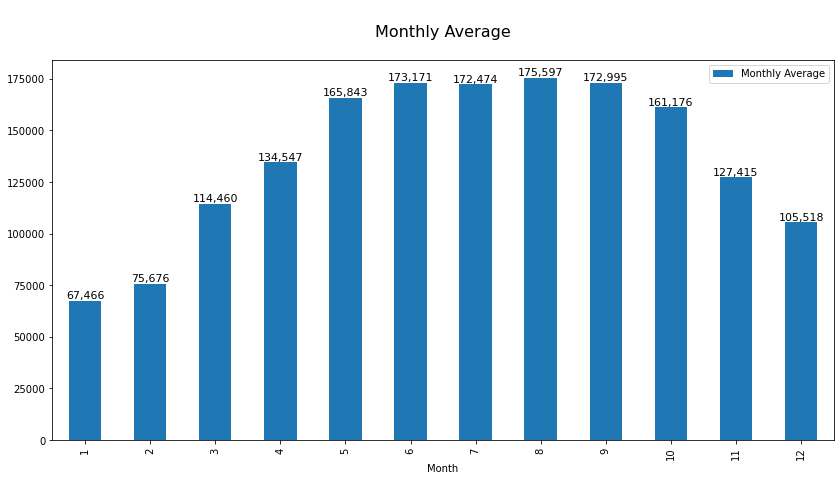

In [136]:
#average_rentals 

def avg_rent_month():
    
    (df.groupby('mnth')['cnt'].agg(['sum'])/2).plot.bar(figsize = (14,7))
    for i in range(12):
        plt.text(i, (df.groupby('mnth')['cnt'].agg(['sum'])/2)['sum'][i+1], 
                 f"{int((df.groupby('mnth')['cnt'].agg(['sum'])/2)['sum'][i+1]):,}", 
                 horizontalalignment='center',
                 fontsize = 11,
                 verticalalignment='bottom')
    plt.xlabel('Month')    
    plt.legend(['Monthly Average'])  
    plt.title('\nMonthly Average\n', {"fontsize": 16})

avg_rent_month()

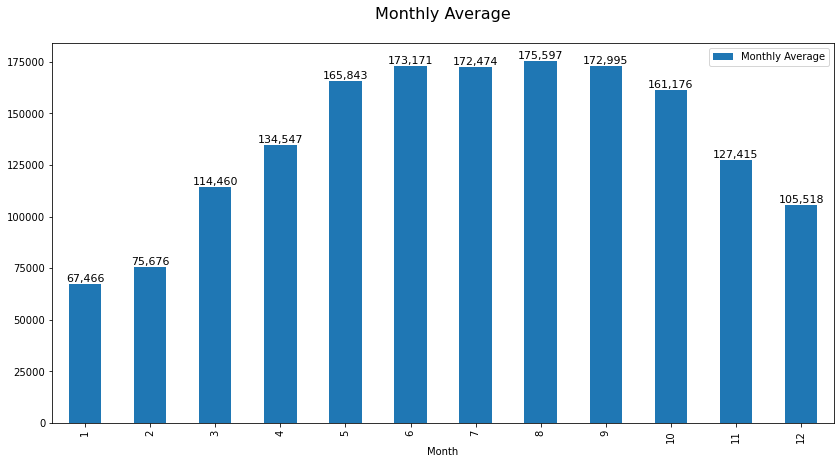

In [135]:
avg_rent_month()

## Day 2, Phase 4
Add a forecast() method to the class.


 The forecast method receives only one argument. The user can only selct Month, either as a Month number (int) or as a string. Be sure to document how you implement it.

 Select all days from the dataframe corresponding to the input description and create an "Average" and "Standard Deviation" arrays for the hours of an entire week. You now have to force a Monday-Sunday analysis (weekday 0-6).

 The forecast() method should then plot a 168-hour period (a Mon-Sun week) corresponding to the average rental with a shaded area corresponding to an interval of [-1 std deviation, +1 std deviation.]. The title of the plot should be something like "Expected weekly rentals in June" if the selected month is June.



#Add forecast method 

Junho

- médias & std diárias desse mes / hora 
- output should have a 168-hour period

In [16]:
a = 'january'

a.isdigit()

False

In [17]:
inp = input("Choose the month you want to see the data for:")
from datetime import datetime

if inp.isdigit():
    mnth_num = int(inp)
    print(mnth_num)
else:
    d = datetime.strptime(inp, '%B')
    mnth_num = int(d.strftime("%m"))

SyntaxError: unmatched ')' (<ipython-input-17-ec13b207ea8a>, line 9)

In [70]:
from datetime import datetime
a = 1

d = datetime.strptime(str(a), '%m')
d.strftime("%B")

'January'

Choose the month you want to see the data for: august


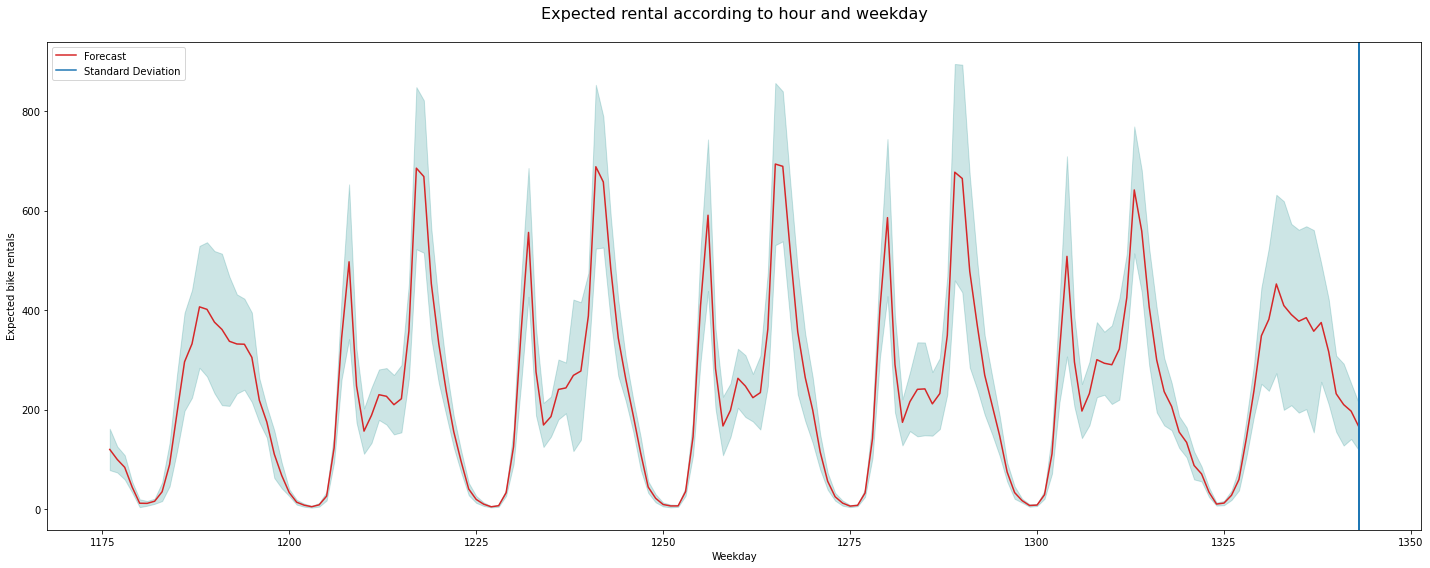

In [332]:
inp = input("Choose the month you want to see the data for:")
from datetime import datetime

try:
    if inp.isdigit():
        mnth_num = int(inp)
    else:
        d = datetime.strptime(inp, '%B')
        mnth_num = int(d.strftime("%m"))
        

    metrics_df= df.groupby(['mnth','weekday','hr'])['cnt'].agg(['mean', 'std']).reset_index(level=[0,1,2])

    metrics_df= metrics_df[metrics_df['mnth']== mnth_num]

    fig, ax = plt.subplots(figsize=(20,8))

    ax.fill_between(metrics_df.index,
    metrics_df['mean']-metrics_df['std'],
    metrics_df['mean']+metrics_df['std'],
    color= 'teal', alpha=0.2)

    metrics_df['mean'].plot(ax=ax, c='C3')
    
    ax.set_xlabel("Weekday")
    ax.set_ylabel("Expected bike rentals")
    #ax.set_xticklabels(metrics_df.index)
    for row in range(metrics_df.index[0], metrics_df.index[-1]):
        if metrics_df['weekday'][row] != metrics_df['weekday'][row+1]:
            plt.axvline(x=ind)
    #ax.set_xticklabels(metrics_df['weekday'])
    #ax.xaxis.set_label_coords(x=0.5, y=-0.2)
    #plt.locator_params(axis='x', nbins=7)
    plt.title("Expected rental according to hour and weekday\n", {"fontsize": 16})
    plt.tight_layout()
    plt.legend(["Forecast", 'Standard Deviation'])
    plt.show()

except:
    print("Invalid input. Please insert the month name or number :) ")


In [243]:
metrics_df= df.groupby(['mnth','weekday','hr'])['cnt'].agg(['mean', 'std'])
metrics_df=metrics_df.reset_index(level=[0])
metrics_df[metrics_df['mnth']== 1]

mnth       mean        std
weekday hr                            
0       0      1  48.200000  27.409650
        1      1  42.400000  28.713915
        2      1  34.800000  24.867650
        3      1  18.900000  15.014437
        4      1   3.666667   2.645751
...          ...        ...        ...
6       19     1  96.222222  68.512367
        20     1  72.555556  48.288485
        21     1  67.555556  39.950316
        22     1  54.111111  32.624548
        23     1  55.888889  31.370545

[168 rows x 3 columns]

Choose the month you want to see the data for: 8


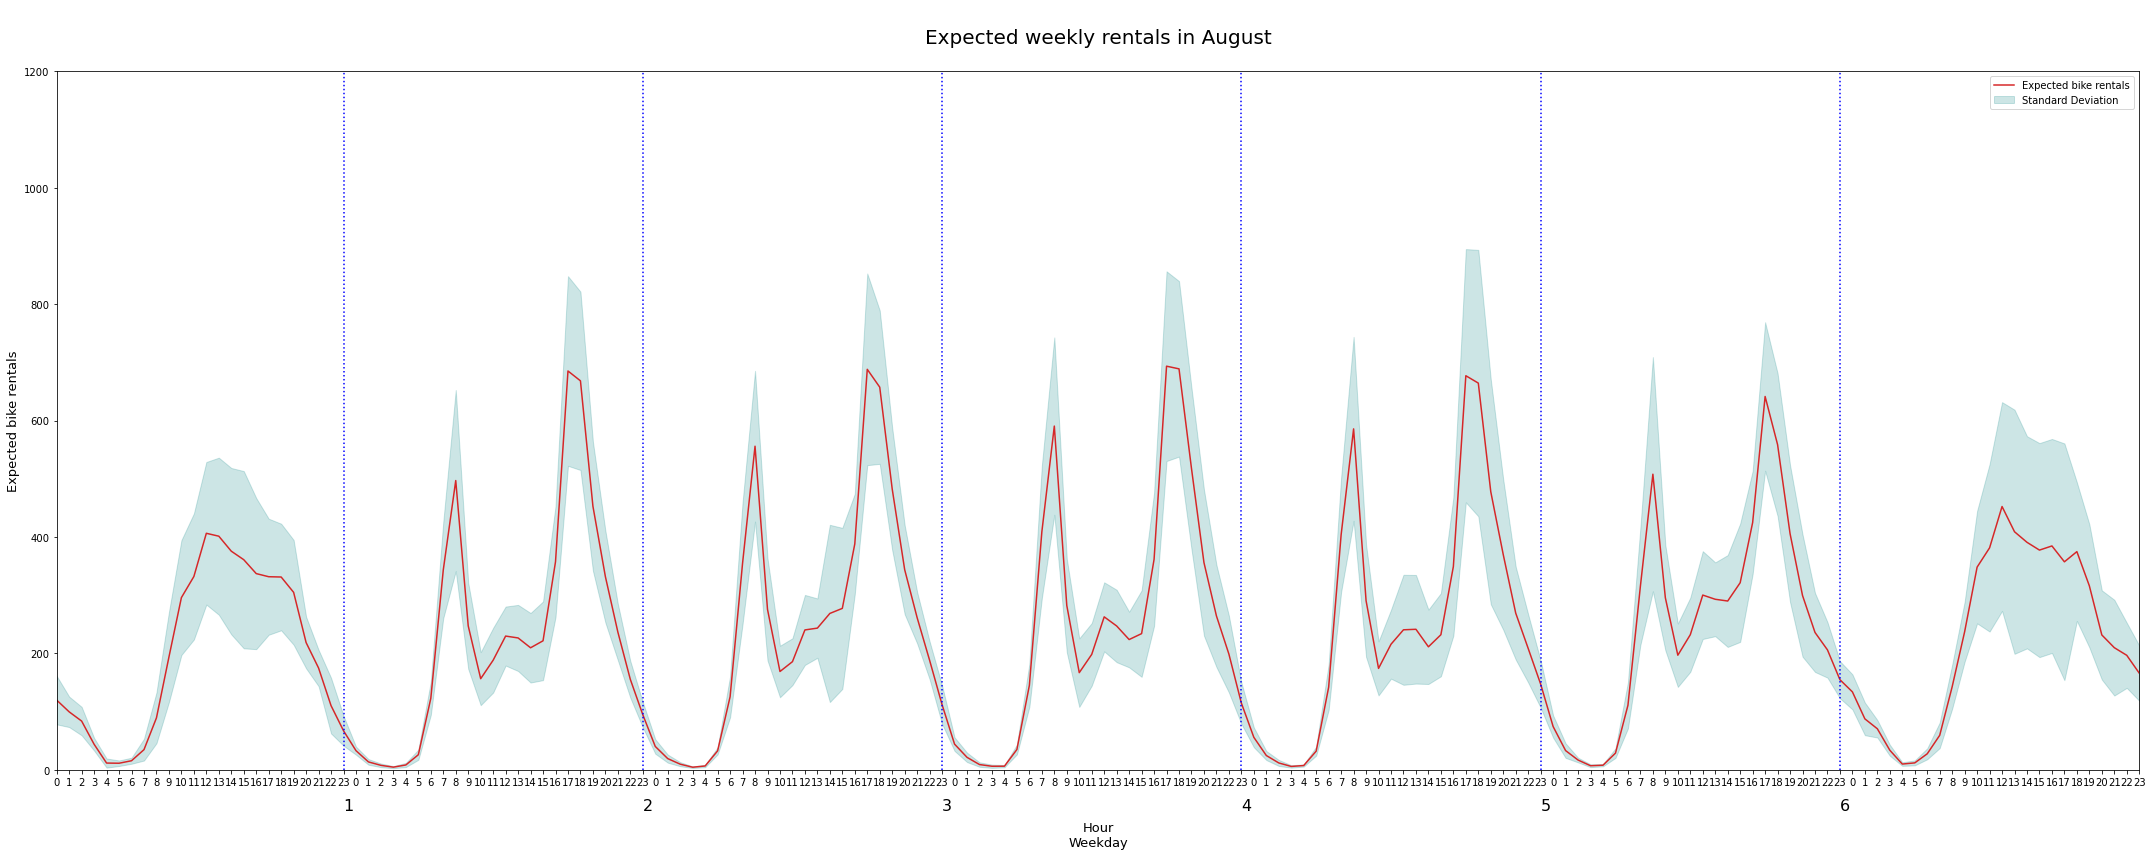

In [429]:
inp = input("Choose the month you want to see the data for:")
from datetime import datetime

try:
    if inp.isdigit():
        mnth_num = int(inp)
    else:
        d = datetime.strptime(inp, '%B')
        mnth_num = int(d.strftime("%m"))


    metrics_df= df.groupby(['mnth','weekday','hr'])['cnt'].agg(['mean', 'std']).reset_index(level=[0,1,2])

    metrics_df= metrics_df[metrics_df['mnth']== mnth_num]

    fig, ax = plt.subplots(figsize=(30,12))

    ax.fill_between(metrics_df.index,
    metrics_df['mean']-metrics_df['std'],
    metrics_df['mean']+metrics_df['std'],
    color= 'teal', alpha=0.2, label = 'Standard Deviation')

    metrics_df['mean'].plot(ax=ax, c='C3', label= 'Expected bike rentals')

    ax.set_ylabel("Expected bike rentals", fontsize = 13)
    ax.set_xlabel("\n\nHour\nWeekday", fontsize = 13)
    ax.set_xticks(list(metrics_df.index))
    ax.set_xticklabels(metrics_df['hr'])
    for row in range(metrics_df.index[0], metrics_df.index[-1]):
        if metrics_df['weekday'][row] != metrics_df['weekday'][row+1]:
            plt.axvline(x=row, ls=':', c='b', label = '_nolegend_')
            plt.text(row, metrics_df['mean'][row], metrics_df['weekday'][row+1],
                    horizontalalignment='left',
                    fontsize = 16,
                    position=(row,-70))
    
    plt.ylim((0, 1200))
    plt.xlim((metrics_df.index[0], metrics_df.index[-1]))
    plt.title("\nExpected weekly rentals in {0}\n".format(datetime.strptime(str(mnth_num), '%m').strftime("%B")), 
              {"fontsize": 20})
    plt.tight_layout()
    plt.legend()
    plt.show()

except:
    print("Invalid input. Please insert the month name or number :)")


In [409]:
a = 'Monday'

datetime.strptime(str(a), '%A')

datetime.datetime(1900, 1, 1, 0, 0)

In [434]:
datetime.now().weekday()

3